In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')


In [3]:
# Check the data
print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

# Data Exploration
check for missing values and fill them

In [4]:
# check for missing values
print(train_data.isna().sum())
print(test_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


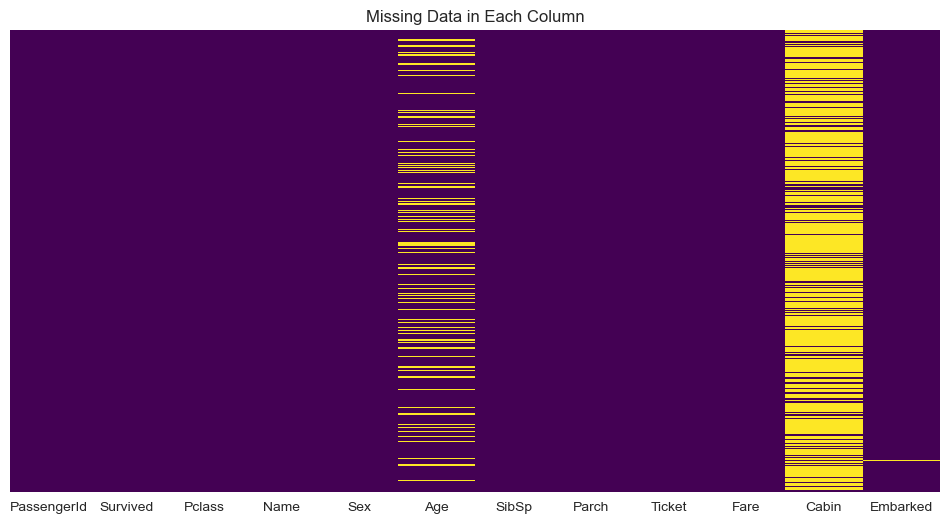

In [5]:
# Visual inspection of the missing data
import seaborn as sns

# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isna(), cbar=False, yticklabels=False, cmap='viridis')

plt.title('Missing Data in Each Column')
plt.show()


In [6]:
# Fill missing values   
def fill_missing_values(data):   
    numeric_columns = ['Age', 'Fare']  # example of numeric columns
    for col in numeric_columns:
        if col in data.columns:
            median_value = int(data[col].median())
            data[col] = data[col].fillna(median_value)

fill_missing_values(train_data)
fill_missing_values(test_data)

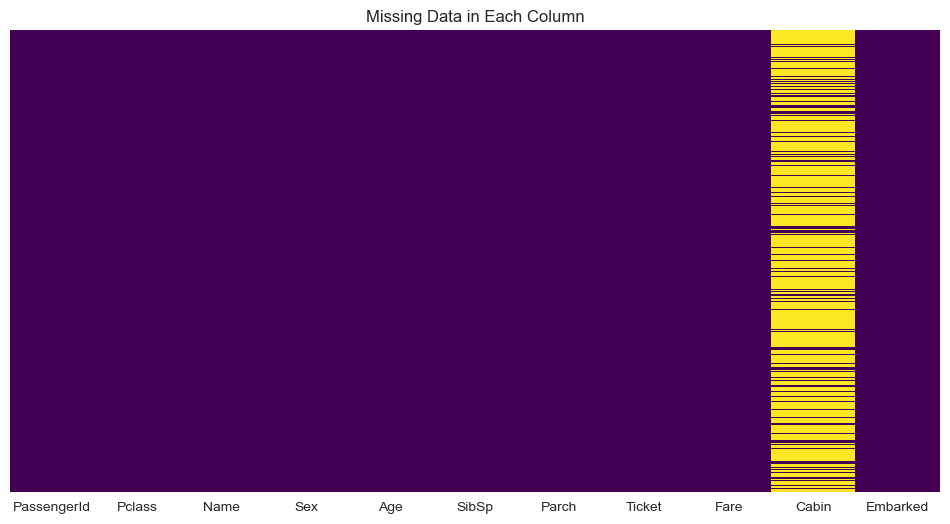

In [7]:
#check again for missing values
# Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(test_data.isna(), cbar=False, yticklabels=False, cmap='viridis')

plt.title('Missing Data in Each Column')
plt.show()

In [8]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# Drop columns that are not needed
def drop_columns(data):
    columns_to_drop = ['Name', 'Ticket', 'Cabin']
    data.drop(columns_to_drop, axis=1, inplace=True)

drop_columns(train_data)
drop_columns(test_data)

In [10]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [11]:
# Convert categorical columns to numerical
def convert_categorical_to_numerical(data):
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)
    return data

train_data = convert_categorical_to_numerical(train_data)
test_data = convert_categorical_to_numerical(test_data)
    


In [12]:
def normalize_data(train_data, test_data):
    # Identify the columns to normalize (exclude 'Survived')
    columns_to_not_normalize = ['Survived', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'PassengerId']
    cols_to_normalize = train_data.columns[train_data.columns.isin(columns_to_not_normalize) == False]
    
    # Calculate mean and standard deviation from the training data for these columns
    mean = train_data[cols_to_normalize].mean()
    std = train_data[cols_to_normalize].std()
    
    # Normalize both training and test data using training data parameters, excluding 'Survived'
    train_data_normalized = train_data.copy()
    test_data_normalized = test_data.copy()

    train_data_normalized[cols_to_normalize] = (train_data[cols_to_normalize] - mean) / std
    test_data_normalized[cols_to_normalize] = (test_data[cols_to_normalize] - mean) / std

    return train_data_normalized, test_data_normalized

# Assuming train_data and test_data are already loaded and preprocessed
train_data_normalized, test_data_normalized = normalize_data(train_data, test_data)

In [13]:
train_data_normalized

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,0.826913,-0.565419,0.432550,-0.473408,-0.502163,1,0,1
1,2,1,-1.565228,0.663488,0.432550,-0.473408,0.786404,0,0,0
2,3,1,0.826913,-0.258192,-0.474279,-0.473408,-0.488580,0,0,1
3,4,1,-1.565228,0.433068,0.432550,-0.473408,0.420494,0,0,1
4,5,0,0.826913,0.433068,-0.474279,-0.473408,-0.486064,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.369158,-0.181385,-0.474279,-0.473408,-0.386454,1,0,1
887,888,1,-1.565228,-0.795839,-0.474279,-0.473408,-0.044356,0,0,1
888,889,0,0.826913,-0.104579,0.432550,2.007806,-0.176164,0,0,1
889,890,1,-1.565228,-0.258192,-0.474279,-0.473408,-0.044356,1,0,0


# Split the data into features and target, and train-validation-test split

In [14]:
# Split the data into features and target
X_train = train_data_normalized.drop('Survived', axis=1)
y_train = train_data_normalized['Survived']

X_test = test_data_normalized


In [15]:
# split test data into validation and test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
X_train.shape[1]

9

# Model Building


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32)

2024-05-04 01:36:38.050496: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10
23/23 [==============================] - 2s 13ms/step - loss: 1.6323 - accuracy: 0.5969 - val_loss: 1.0256 - val_accuracy: 0.4078
Epoch 2/10
23/23 [==============================] - 0s 1ms/step - loss: 0.7617 - accuracy: 0.5435 - val_loss: 0.6501 - val_accuracy: 0.5922
Epoch 3/10
23/23 [==============================] - 0s 1ms/step - loss: 0.6733 - accuracy: 0.6152 - val_loss: 0.6459 - val_accuracy: 0.6201
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6447 - val_loss: 0.6388 - val_accuracy: 0.6145
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.6433 - val_loss: 0.6315 - val_accuracy: 0.6480
Epoch 6/10
23/23 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.6629 - val_loss: 0.6551 - val_accuracy: 0.6816
Epoch 7/10
23/23 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6531 - val_loss: 0.6282 - val_accuracy: 0.7151
Epoch 8/10
23/23 [=

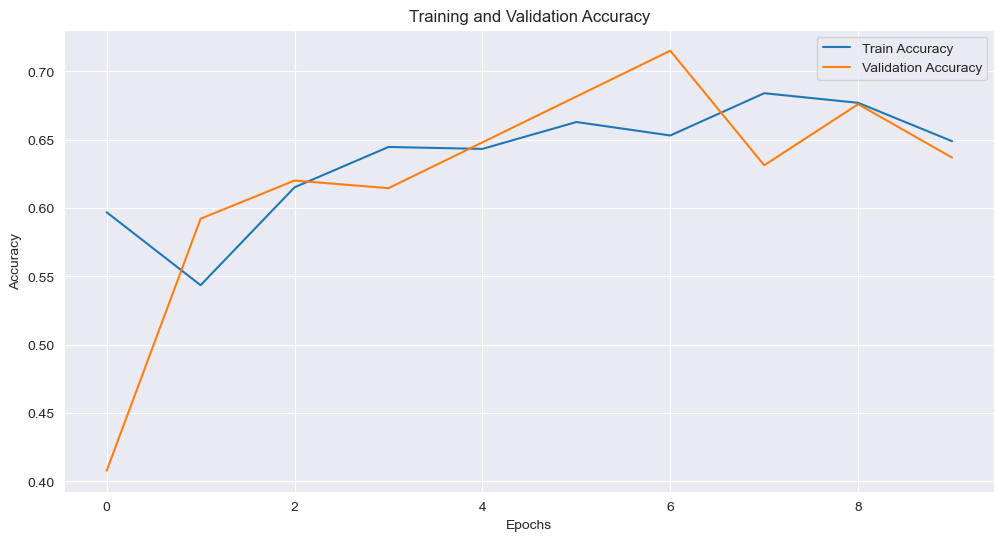

In [20]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


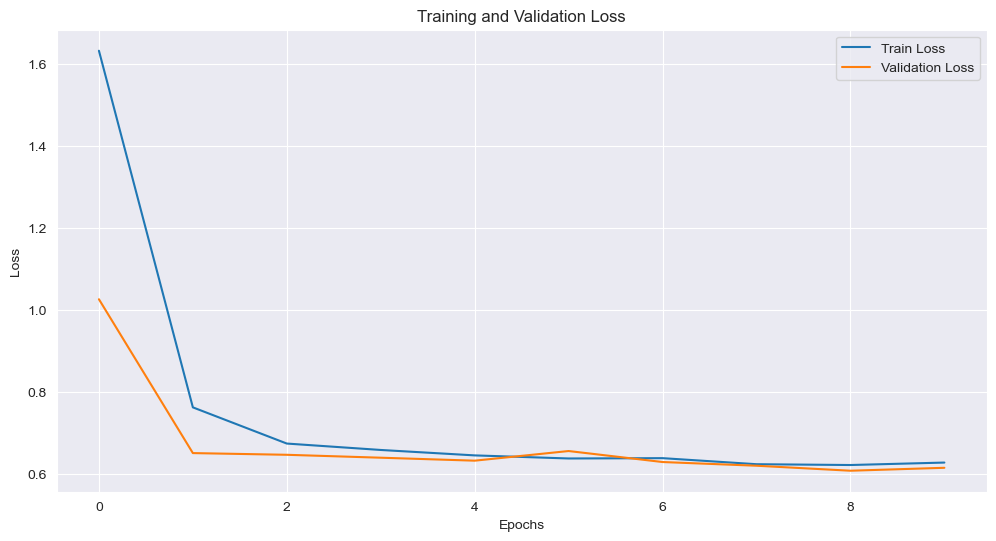

In [21]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [22]:
# Evaluate the model on the test data
model.evaluate(X_val, y_val)


6/6 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.6369


[0.6141772270202637, 0.6368715167045593]

In [27]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int).reshape(X_test.shape[0])


14/14 [==============================] - 0s 585us/step


In [29]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)


In [25]:
# Save the model
model.save('model.h5')



In [26]:
# Show survival rate by sex
